<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/ML/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the dataset

In [ ]:
realEstate=pd.read_csv("/content/drive/MyDrive/realEstate_Riyadh.csv", sep=';')
#drop columns not include in our expermanints
realEstate.drop(columns=['id','onMarket', "latitude", 'longitude', 'district'], inplace=True) 
realEstate

,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,IsRent,price
0,225.0,9.0,3,0.0,2,15.0,1.0,0.0,5.00,False,20000
1,130.0,12.0,3,1.0,2,30.0,1.0,0.0,4.33,True,25000
2,200.0,NaN,3,1.0,2,25.0,0.0,0.0,4.67,True,22000
3,120.0,0.0,1,1.0,1,34.0,1.0,0.0,4.17,False,38000
4,60.0,9.0,1,1.0,1,39.0,1.0,0.0,4.42,False,25000
...,...,...,...,...,...,...,...,...,...,...,...
6757,180.0,0.0,3,1.0,2,18.0,1.0,0.0,4.31,False,60000
6758,90.0,25.0,2,1.0,1,5.0,0.0,0.0,4.82,False,9800
6759,120.0,5.0,3,1.0,2,20.0,1.0,1.0,5.00,False,50000
6760,200.0,1.0,2,2.0,2,15.0,1.0,0.0,4.54,False,40000


In [ ]:
#Number of rows and columns in the dataset 
realEstate.shape

(6762, 11)

# Take only Rentail dataset

In [ ]:
#compute each value in column IsRent
realEstate.IsRent.value_counts()

False    3753
True     3009
Name: IsRent, dtype: int64

In [ ]:
#Drop the data that have not rent
realEstate_new = realEstate[(realEstate['IsRent'] == False)].index
realEstate.drop(realEstate_new , inplace=True)
realEstate

,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,IsRent,price
1,130.0,12.0,3,1.0,2,30.0,1.0,0.0,4.33,True,25000
2,200.0,NaN,3,1.0,2,25.0,0.0,0.0,4.67,True,22000
5,170.0,3.0,3,1.0,2,35.0,0.0,0.0,4.47,True,40000
9,160.0,2.0,4,1.0,2,27.0,1.0,0.0,4.79,True,40000
10,150.0,1.0,1,0.0,1,39.0,1.0,0.0,4.29,True,19000
...,...,...,...,...,...,...,...,...,...,...,...
6747,75.0,3.0,2,1.0,1,22.0,1.0,0.0,4.78,True,27000
6750,80.0,0.0,1,1.0,1,30.0,1.0,0.0,4.37,True,30000
6753,175.0,2.0,4,1.0,5,19.0,1.0,0.0,4.31,True,60000
6755,175.0,0.0,3,1.0,2,30.0,1.0,0.0,3.74,True,75000


In [ ]:
# See the column data types and non missing values
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 1 to 6756
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              2945 non-null   float64
 1   age               2661 non-null   float64
 2   num_bedrooms      3009 non-null   int64  
 3   num_livings       3009 non-null   float64
 4   num_water_cycles  3009 non-null   int64  
 5   street_width      2936 non-null   float64
 6   IsKetchen         3005 non-null   float64
 7   IsFurnished       2996 non-null   float64
 8   review            2845 non-null   float64
 9   IsRent            3009 non-null   bool   
 10  price             3009 non-null   int64  
dtypes: bool(1), float64(7), int64(3)
memory usage: 261.5 KB


# Dealing with missing value 

In [ ]:
#First: 
#compute all NaN value in each column
realEstate.isnull().sum()

area                 64
age                 348
num_bedrooms          0
num_livings           0
num_water_cycles      0
street_width         73
IsKetchen             4
IsFurnished          13
review              164
IsRent                0
price                 0
dtype: int64

In [ ]:
#Second:
#Replacing all NaN values with 0
realEstate.fillna({'review':0}, inplace=True)
realEstate.fillna({'num_livings':0}, inplace=True)
realEstate.fillna({'IsKetchen':0}, inplace=True)
realEstate.fillna({'IsFurnished':0}, inplace=True)

In [ ]:
#Thired:
#Drope all rows has NaN value from dataset
data=realEstate.dropna()

#Finally:
#Examing the changes
data

,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,IsRent,price
1,130.0,12.0,3,1.0,2,30.0,1.0,0.0,4.33,True,25000
5,170.0,3.0,3,1.0,2,35.0,0.0,0.0,4.47,True,40000
9,160.0,2.0,4,1.0,2,27.0,1.0,0.0,4.79,True,40000
10,150.0,1.0,1,0.0,1,39.0,1.0,0.0,4.29,True,19000
11,8.0,0.0,2,1.0,1,29.0,1.0,0.0,4.40,True,27000
...,...,...,...,...,...,...,...,...,...,...,...
6747,75.0,3.0,2,1.0,1,22.0,1.0,0.0,4.78,True,27000
6750,80.0,0.0,1,1.0,1,30.0,1.0,0.0,4.37,True,30000
6753,175.0,2.0,4,1.0,5,19.0,1.0,0.0,4.31,True,60000
6755,175.0,0.0,3,1.0,2,30.0,1.0,0.0,3.74,True,75000


# Change datatype

In [ ]:
# Convert int columns to float datatype

data['price'] = data['price'].astype(float)

data['num_bedrooms'] = data['num_bedrooms'].astype(float)
data['num_water_cycles'] = data['num_water_cycles'].astype(float)

#assert NewRealEstate['price'].dtype == 'float'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
data.drop(columns=['IsRent'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Exploratory Data Analysis (EDA)


<Figure size 432x288 with 0 Axes>

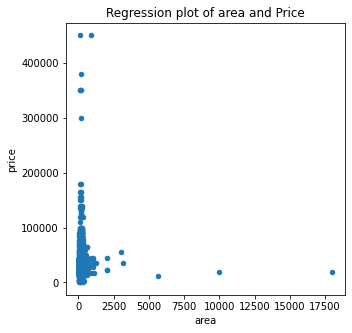

<Figure size 432x288 with 0 Axes>

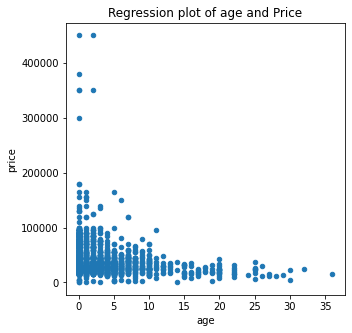

<Figure size 432x288 with 0 Axes>

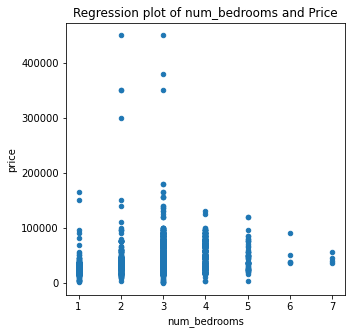

<Figure size 432x288 with 0 Axes>

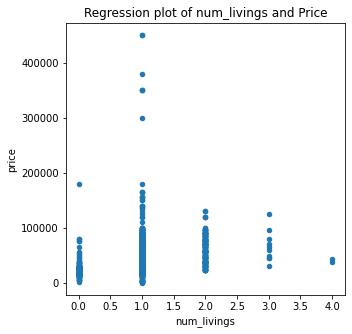

<Figure size 432x288 with 0 Axes>

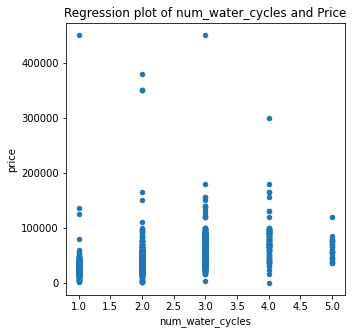

<Figure size 432x288 with 0 Axes>

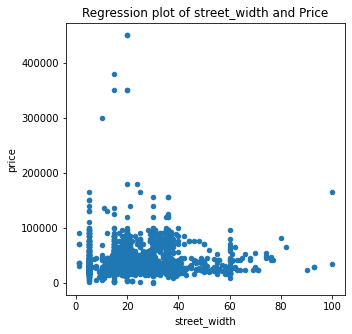

<Figure size 432x288 with 0 Axes>

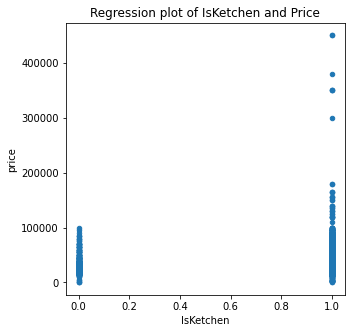

<Figure size 432x288 with 0 Axes>

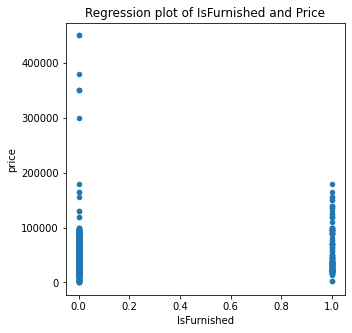

<Figure size 432x288 with 0 Axes>

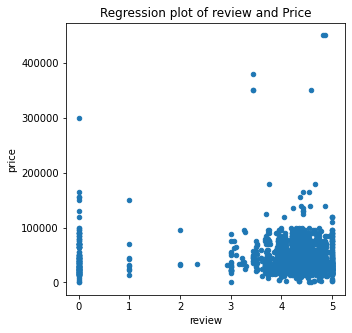

In [ ]:
variables = ['area',	'age','num_bedrooms','num_livings','num_water_cycles'	,'street_width',	'IsKetchen',	'IsFurnished'	,'review']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    data.plot(kind = "scatter", x=var, y="price", figsize=(5,5)).set(title=f'Regression plot of {var} and Price');


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5cd2f40d0>,
      dtype=object)

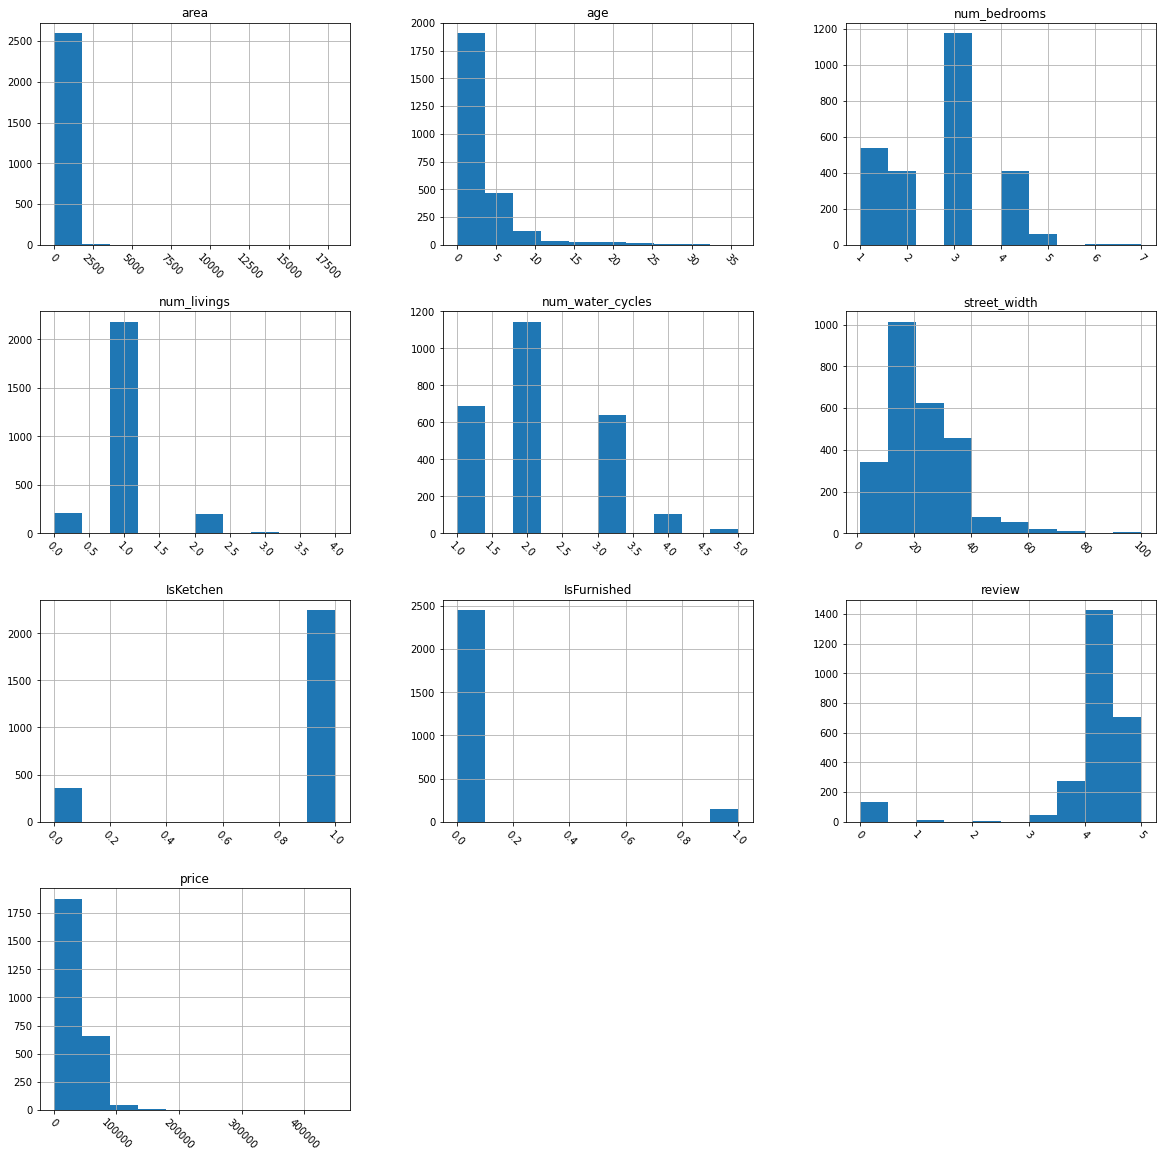

In [ ]:
data.hist(figsize=(20,20), xrot=-45)

In [ ]:
print(data.describe().round(2).T)

                   count      mean       std   min       25%       50%  \
area              2600.0    179.84    441.69   1.0    100.00    150.00   
age               2600.0      2.65      4.17   0.0      0.00      1.00   
num_bedrooms      2600.0      2.65      1.07   1.0      2.00      3.00   
num_livings       2600.0      1.00      0.42   0.0      1.00      1.00   
num_water_cycles  2600.0      2.09      0.87   1.0      1.00      2.00   
street_width      2600.0     23.83     12.93   1.0     15.00     20.00   
IsKetchen         2600.0      0.86      0.34   0.0      1.00      1.00   
IsFurnished       2600.0      0.06      0.23   0.0      0.00      0.00   
review            2600.0      4.12      1.03   0.0      4.14      4.36   
price             2600.0  41531.47  28492.61  75.0  25000.00  35000.00   

                       75%       max  
area                190.00   18000.0  
age                   4.00      36.0  
num_bedrooms          3.00       7.0  
num_livings           1.00   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 1 to 6756
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              2600 non-null   float64
 1   age               2600 non-null   float64
 2   num_bedrooms      2600 non-null   float64
 3   num_livings       2600 non-null   float64
 4   num_water_cycles  2600 non-null   float64
 5   street_width      2600 non-null   float64
 6   IsKetchen         2600 non-null   float64
 7   IsFurnished       2600 non-null   float64
 8   review            2600 non-null   float64
 9   price             2600 non-null   float64
dtypes: float64(10)
memory usage: 223.4 KB


## **Feature Engineering**


# Remove outliers

In [ ]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [ ]:
columns = data.columns
n_std = 3
New_data= remove_outliers(data,columns,n_std)
New_data

Working on column: area
Working on column: age
Working on column: num_bedrooms
Working on column: num_livings
Working on column: num_water_cycles
Working on column: street_width
Working on column: IsKetchen
Working on column: IsFurnished
Working on column: review
Working on column: price


,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,price
1,130.0,12.0,3.0,1.0,2.0,30.0,1.0,0.0,4.33,25000.0
5,170.0,3.0,3.0,1.0,2.0,35.0,0.0,0.0,4.47,40000.0
9,160.0,2.0,4.0,1.0,2.0,27.0,1.0,0.0,4.79,40000.0
10,150.0,1.0,1.0,0.0,1.0,39.0,1.0,0.0,4.29,19000.0
11,8.0,0.0,2.0,1.0,1.0,29.0,1.0,0.0,4.40,27000.0
...,...,...,...,...,...,...,...,...,...,...
6745,220.0,0.0,2.0,2.0,2.0,20.0,1.0,0.0,4.82,35000.0
6747,75.0,3.0,2.0,1.0,1.0,22.0,1.0,0.0,4.78,27000.0
6750,80.0,0.0,1.0,1.0,1.0,30.0,1.0,0.0,4.37,30000.0
6755,175.0,0.0,3.0,1.0,2.0,30.0,1.0,0.0,3.74,75000.0


# **Scalling Dataset with Stander Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
dataset = scaler.fit_transform(New_data)

features = pd.DataFrame(dataset, columns= New_data.columns)
features

,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,price
0,-0.277913,3.400163,0.354227,0.008955,-0.081142,0.581712,0.409280,0.0,0.197755,-0.745918
1,0.068091,0.290411,0.354227,0.008955,-0.081142,1.010798,-2.443315,0.0,0.340516,0.013988
2,-0.018410,-0.055117,1.323624,0.008955,-0.081142,0.324260,0.409280,0.0,0.666825,0.013988
3,-0.104911,-0.400645,-1.584567,-2.573324,-1.320842,1.354066,0.409280,0.0,0.156967,-1.049881
4,-1.333224,-0.746173,-0.615170,0.008955,-1.320842,0.495895,0.409280,0.0,0.269135,-0.644598
...,...,...,...,...,...,...,...,...,...,...
2302,0.500595,-0.746173,-0.615170,2.591234,-0.081142,-0.276460,0.409280,0.0,0.697416,-0.239314
2303,-0.753668,0.290411,-0.615170,0.008955,-1.320842,-0.104826,0.409280,0.0,0.656628,-0.644598
2304,-0.710417,-0.746173,-1.584567,0.008955,-1.320842,0.581712,0.409280,0.0,0.238544,-0.492616
2305,0.111341,-0.746173,0.354227,0.008955,-0.081142,0.581712,0.409280,0.0,-0.403878,1.787101


## **Feature Selection**

# Split to Train and Test dataset

In [ ]:
features.insert(0, 'Ones', 1)
cols = features.shape[1]
X = features.iloc[:,0:cols-1] 
y = features.iloc[:,cols-1:cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, train_size = 0.70)

In [ ]:
X_train.shape, X_test.shape

((1614, 10), (693, 10))

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.6)
print( 'correlation length =:' ,len(set(corr_features)) , '\n', 'correlation column name:',corr_features )

correlation length =: 1 
 correlation column name: {'num_water_cycles'}


In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Ones,area,age,num_bedrooms,num_livings,street_width,IsKetchen,IsFurnished,review
666,1,-0.537415,-0.055117,-0.615170,-2.573324,-0.877180,0.409280,0.0,0.656628
1566,1,1.192603,-0.746173,0.354227,0.008955,-0.448094,0.409280,0.0,0.371107
2078,1,-0.104911,2.709107,1.323624,0.008955,-0.705546,-2.443315,0.0,-0.046977
868,1,0.137292,-0.746173,1.323624,0.008955,-0.705546,0.409280,0.0,0.126375
200,1,-0.191412,-0.746173,0.354227,0.008955,-0.533912,0.409280,0.0,0.126375
...,...,...,...,...,...,...,...,...,...
1208,1,-0.450915,0.290411,0.354227,0.008955,-0.276460,0.409280,0.0,-0.199934
766,1,-0.243312,-0.746173,0.354227,0.008955,0.581712,0.409280,0.0,0.299727
1296,1,-0.364414,-0.055117,-0.615170,0.008955,1.439884,0.409280,0.0,0.177361
2267,1,2.057612,-0.055117,0.354227,0.008955,-0.276460,0.409280,0.0,-0.148948


# Implemente Linear Regression

##**A investigate: Impact of altering the cost function**


compute the predicted value (h(x)) in cost function J(θ) in one function

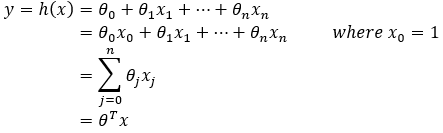

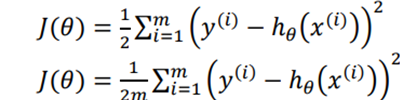

In [ ]:
def FirstCost(X, y, theta):
    inner = np.power((y - (X * theta.T)), 2)
    return np.sum(inner) / (2)

In [ ]:
def SecondCost(X, y, theta):
    inner = np.power((y-(X * theta.T)), 2)
    return np.sum(inner) / (2 * len(X))

In [ ]:
#Accuracy
def r_squared(Y, YP):
    ssr, sse, r_sqr = [0]*3
    YM = np.mean(Y)
    sse=np.sum(np.square(YP-YM))
    sst=np.sum(np.square(Y-YM))
    r_sqr = 1 - (sse / sst)
    return r_sqr

#Comperion

In [ ]:
#Define paramters

X = np.matrix(X_train.values) #Training
y = np.matrix(y_train.values)
X_of_test = np.matrix(X_test.values)#Testing
y_of_test = np.matrix(y_test.values)
theta = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0]))
iters = 1000 #Fix iteration

print("FirstCost Function= ", FirstCost(X,y, theta))
print("SecondCost Function= ", SecondCost(X, y, theta))

FirstCost Function=  815.5392543509256
SecondCost Function=  0.5052907399943777


## **Gradient Descent**

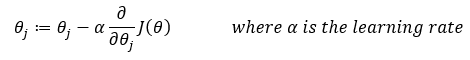

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) 
    cost = np.zeros(iters)

    # iterate over examples
    # predict y with current bias and coefficient
    for i in range(iters):
        error = (X * theta.T) - y 
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #update thetas
            
        theta = temp #new thetas
        cost[i] = SecondCost(X, y, theta) #error at each itereation
        
    return theta, cost

# **B investigate : Impact of Learing Rate 𝛼**


# Attempt.1: A very small (𝛼 = 0.0001)

0.001, 0.01, 0.1, 1, 10, 100}**
= 0.001

In [ ]:
lr_1 = 0.0001

%time
print("''''''''''''''''''''''Training''''''''''''''''''''")
g1, cost1 = gradientDescent(X, y, theta, lr_1, iters)
print("error:" ,SecondCost(X, y, g1) )
#predict
theta_list=g1[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g1_test, cost1_test = gradientDescent(X_of_test, y_of_test, theta, lr_1, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g1_test))
theta_list=g1_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.3 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.4314424696664665
accuracy: 0.9868238635397751
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.4122640682147556
accuracy: 0.9867433288236603


Text(0.5, 1.0, 'Error vs. Iterations')

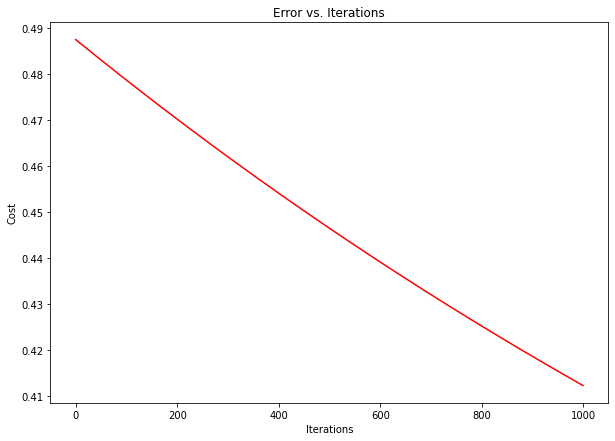

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost1_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# Attempt.2: A very small (𝛼 = 0.001)

In [ ]:
lr_2 = 0.001

#Training
%time
print("''''''''''''''''''''''Training''''''''''''''''''''")
g2, cost2 = gradientDescent(X, y, theta, lr_2, iters)
print("error:" ,SecondCost(X, y, g2) )
#predict
theta_list=g2[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g2_test, cost2_test = gradientDescent(X_of_test, y_of_test, theta, lr_2, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g2_test))

theta_list=g2_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))



CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 23.4 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.2521698447576688
accuracy: 0.6768787422416489
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.23276410581482887
accuracy: 0.6754811244235718


Text(0.5, 1.0, 'Error vs. Iterations')

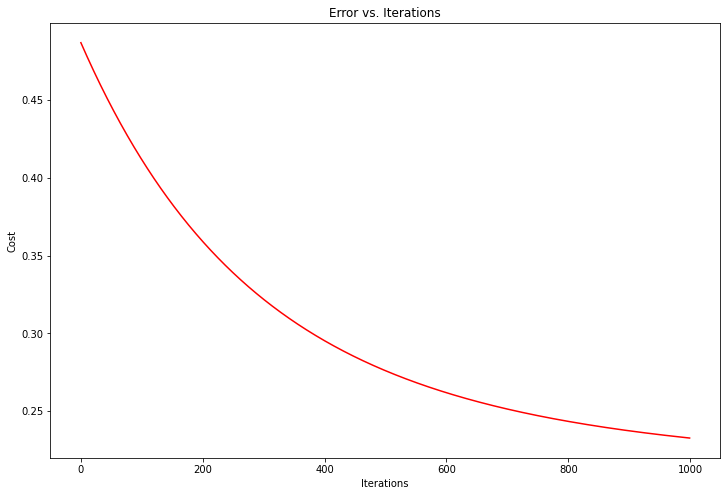

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# Attempt.3: A good one  (𝛼 = 0.01)



In [ ]:
lr_3 = 0.01
#Training
%time 

print("''''''''''''''''''''''Training''''''''''''''''''''")
g3, cost3 = gradientDescent(X, y, theta, lr_3, iters)
print("error:" ,SecondCost(X, y, g3) )
#predict
theta_list=g3[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g3_test, cost3_test = gradientDescent(X_of_test, y_of_test, theta, lr_3, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g3_test))

theta_list=g3_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))



CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.9 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.22310535953031924
accuracy: 0.44762930756543773
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.20890273157874362
accuracy: 0.47508228034826483


Text(0.5, 1.0, 'Error vs. Iterations')

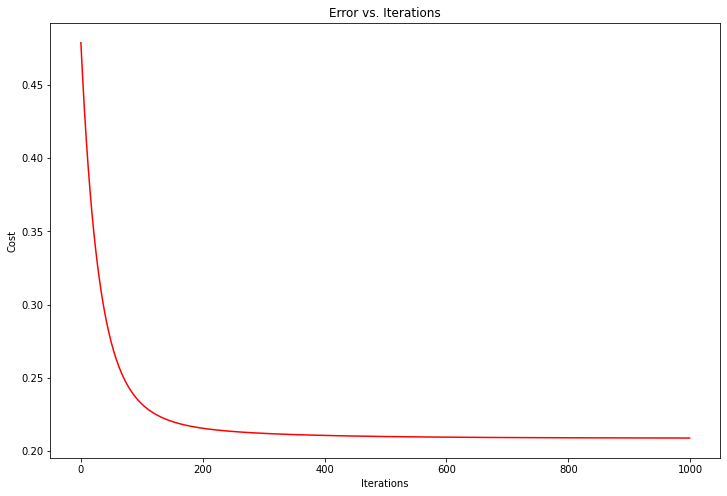

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost3_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# Attempt.4: The Best one (𝛼 = 0.1)

In [ ]:
lr_4 = 0.1
#Training
%time
print("''''''''''''''''''''''Training''''''''''''''''''''")
g4, cost4 = gradientDescent(X, y, theta, lr_4, iters)
print("error:" ,SecondCost(X, y, g4) )

#predict
theta_list=g4[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g4_test, cost4_test = gradientDescent(X_of_test, y_of_test, theta, lr_4, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g4_test))

theta_list=g4_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))


CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 12.4 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.2229555762083044
accuracy: 0.44124331423202157
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.20879899090203483
accuracy: 0.4717359023191119


Text(0.5, 1.0, 'Error vs. Iterations')

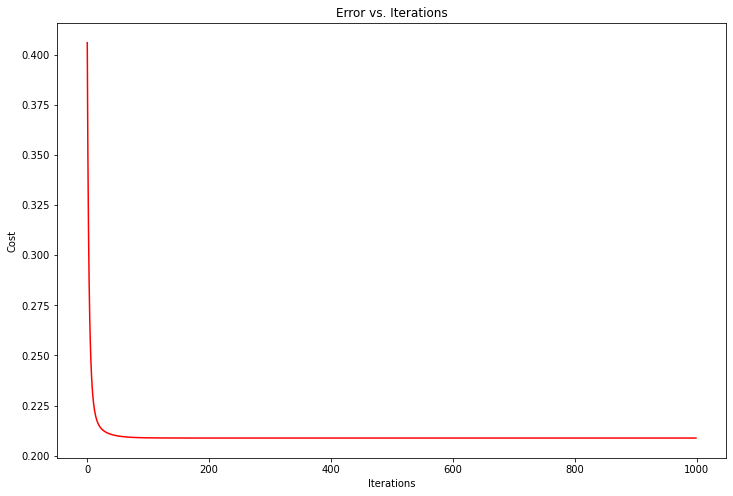

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost4_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# Attempt.5: A large one  (𝛼 = 1)

In [ ]:
lr_5 = 1
#Training
%time

print("''''''''''''''''''''''Training''''''''''''''''''''")
g5, cost5 = gradientDescent(X, y, theta, lr_5, iters)
print("error:" ,SecondCost(X, y, g5) )
#predict
theta_list=g5[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g5_test, cost5_test = gradientDescent(X_of_test, y_of_test, theta, lr_5, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g5_test))

theta_list=g5_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.11 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 7.879309181235524e+132
accuracy: -1.5593655723257167e+133
''''''''''''''''''''''Testing''''''''''''''''''''
error: 1.7262861645773092e+120
accuracy: -3.3483117016260217e+120


Text(0.5, 1.0, 'Error vs. Iterations')

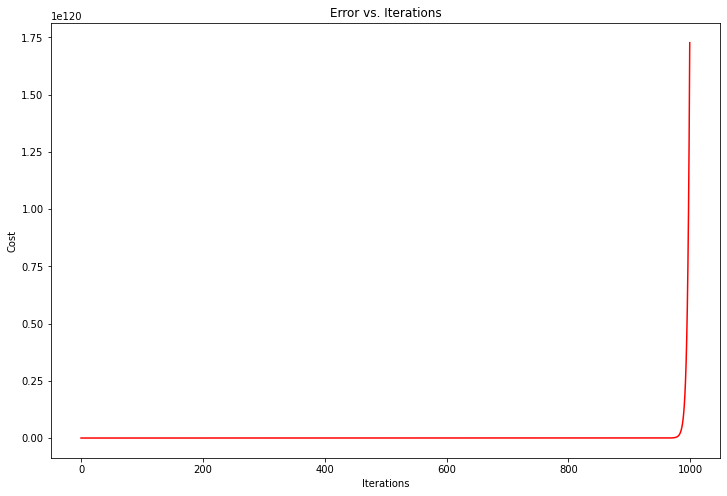

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost5_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# Attempt.6: A very large (𝛼 = 10)

In [ ]:
lr_6 = 10
#Trining
%time

print("''''''''''''''''''''''Training''''''''''''''''''''")
g6, cost6 = gradientDescent(X, y, theta, lr_6, iters)
print("error:" ,SecondCost(X, y, g6) )
#predict
theta_list=g6[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g6_test, cost6_test = gradientDescent(X_of_test, y_of_test, theta, lr_6, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g6_test))

theta_list=g6_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
''''''''''''''''''''''Training''''''''''''''''''''


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


error: nan
accuracy: nan
''''''''''''''''''''''Testing''''''''''''''''''''
error: nan
accuracy: nan


Text(0.5, 1.0, 'Error vs. Iterations')

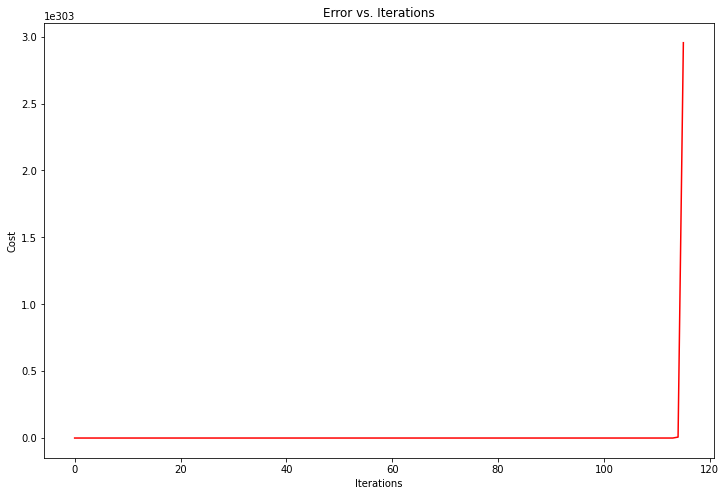

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost6_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# Attempt.7: The worst one (𝛼 = 100)

In [ ]:
lr_7 = 100
#Trining
%time
print("''''''''''''''''''''''Training''''''''''''''''''''")
g7, cost7 = gradientDescent(X, y, theta, lr_7, iters)
print("error:" ,SecondCost(X, y, g7) )
#predict
theta_list=g7[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
g7_test, cost7_test = gradientDescent(X_of_test, y_of_test, theta, lr_7, iters)
print("error:" , SecondCost(X_of_test, y_of_test, g7_test))

theta_list=g7_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.78 µs
''''''''''''''''''''''Training''''''''''''''''''''


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


error: nan
accuracy: nan
''''''''''''''''''''''Testing''''''''''''''''''''


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':


error: nan
accuracy: nan


Text(0.5, 1.0, 'Error vs. Iterations')

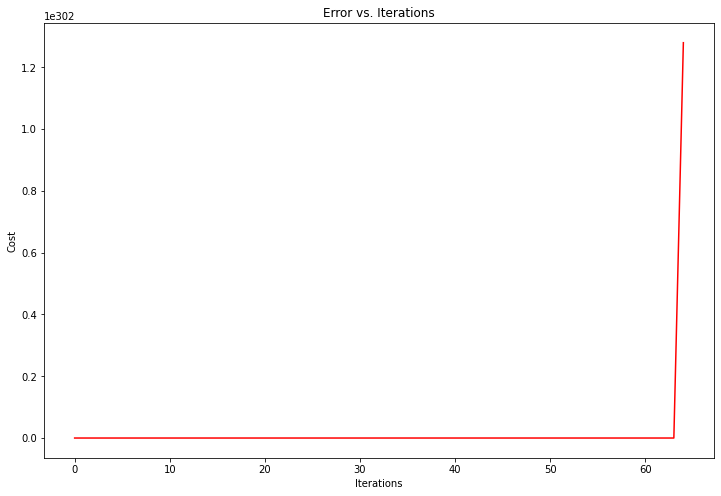

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost7_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# **C investigate : Compare my best mode performance with sklearn**


In [ ]:
# linear regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Traing the model
%time
model = LinearRegression().fit(X_train, y_train)

#predicing the model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

# model evaluation
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
print("''''''''''''''''''''''Training''''''''''''''''''''")
print("error:" ,mse_train )
print("accuracy:", score_train)

print("''''''''''''''''''''''Testing''''''''''''''''''''")
print("error:" ,mse_test )
print("accuracy:", score_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.44591115241660884
accuracy: 0.5587566857698103
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.4205651701925033
accuracy: 0.5688020556272153


# **Investigate D : Regularized My linear regression model**

In [ ]:
def SecondCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [ ]:
def gradientDescentReg(X, y, theta, alpha, iters, lamb):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) 
    cost = np.zeros(iters)

    # iterate over examples
    # predict y with current bias and coefficient
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = (1-(alpha/lamb))*theta[0,j] - ((alpha / len(X)) * np.sum(term)) #Modyfi with Regularization Parameter
            
        theta = temp #new thetas
        cost[i] = SecondCost(X, y, theta) #error at each itereation
        
    return theta, cost

In [ ]:
#Training
%time
print("''''''''''''''''''''''Training''''''''''''''''''''")
gL, costL= gradientDescentReg(X, y, theta,0.1, 1000, 100)
print("error:" ,SecondCost(X, y, gL) )
#predict
theta_list=gL[-1]
y_pred_T=np.dot(X , theta_list.T)
print("accuracy:", r_squared(y,y_pred_T))

print("''''''''''''''''''''''Testing''''''''''''''''''''")
gL_test, costL_test = gradientDescentReg(X_of_test, y_of_test, theta, 0.1,1000, 100)
print("error:" , SecondCost(X_of_test, y_of_test, gL_test))

theta_list=gL_test[-1]
y_pred_S=np.dot(X , theta_list.T)
print("accuracy:",r_squared(y,y_pred_S))


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.22300002575207173
accuracy: 0.4513558644314912
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.2088330126676162
accuracy: 0.48008227746909937


Text(0.5, 1.0, 'Error vs. Iterations')

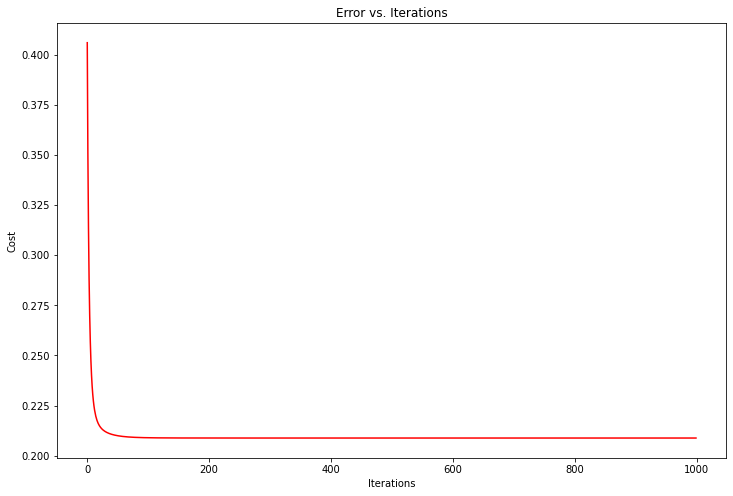

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), costL_test, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

# **Investigate E : Compare my model with another regressor (Ridge Regression)**

In [ ]:
ridge_model = Ridge(alpha=0.3).fit(X_train, y_train)
#predicing the model
y_pred_test = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)
score_train = ridge_model.score(X_train, y_train)
score_test = ridge_model.score(X_test, y_test)

# model evaluation
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)
print("''''''''''''''''''''''Training''''''''''''''''''''")
print("error:" ,mse_train )
print("accuracy:", score_train)

print("''''''''''''''''''''''Testing''''''''''''''''''''")
print("error:" ,mse_test )
print("accuracy:", score_test)

''''''''''''''''''''''Training''''''''''''''''''''
error: 0.44591118501663624
accuracy: 0.5587566535110429
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.420554316668643
accuracy: 0.5688131835510413


# **Investigate F : Polynomial regression model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)

x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

poly_model_train = LinearRegression().fit(x_train_poly, y_train)
poly_model_test = LinearRegression().fit(x_test_poly, y_test)
%time

#predicing the model
y_pred_train = poly_model_train.predict(x_train_poly)
y_pred_test = poly_model_test.predict(x_test_poly)


score_train = poly_model_train.score(x_train_poly, y_train)
score_test = poly_model_test.score(x_test_poly, y_test)



# model evaluation
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)


print("''''''''''''''''''''''Training''''''''''''''''''''")
print("error:" ,mse_train )
print("accuracy:", score_train)

print("''''''''''''''''''''''Testing''''''''''''''''''''")
print("error:" ,mse_test )
print("accuracy:", score_test)

 

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 8.11 µs
''''''''''''''''''''''Training''''''''''''''''''''
error: 0.23348173350601967
accuracy: 0.7689623743517549
''''''''''''''''''''''Testing''''''''''''''''''''
error: 0.12924713350831038
accuracy: 0.867485226464786
